# **Data Analysis & Preprocessing:**

In [35]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
import string
import math
import time
import os
import unicodedata

# Sklearn libraries for machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate, validation_curve, learning_curve
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# NLTK libraries for text processing (lemmatization, stemming, stopwords, POS tagging)
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

# Set up visualization
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Download necessary NLTK resources for text processing
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Open Multilingual Wordnet
nltk.download('punkt')  # Tokenizer
nltk.download('punkt_tab')
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger for part-of-speech tagging
nltk.download('averaged_perceptron_tagger_eng')  # Additional tagger
nltk.download('tagsets_json')  # Tagset resource

print("\n All libraries imported successfully!")


 All libraries imported successfully!


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagse

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:

df_train = pd.read_excel('/content/drive/MyDrive/Assignment 1 Data/Assignment 1 Data/AI_vs_huam_train_dataset.xlsx')
df_test = pd.read_csv('/content/drive/MyDrive/Assignment 1 Data/Assignment 1 Data/Final_test_data.csv')

In [4]:
df_train

,essay,label
0,International sports events require the most w...,0
1,Globalisation has become a significant aspect ...,0
2,There is an ever-increasing number of bullying...,0
3,"It is commonly believed, that companies should...",0
4,Despite knowing about the adverse effects of c...,0
...,...,...
3723,I agree that successful people are willing to ...,1
3724,I believe that people who are open to trying n...,1
3725,"To succeed in life, we must do everything poss...",1
3726,"I'm not entirely sure what the word ""successfu...",1


In [36]:
#  Advanced Text Preprocessing with Lemmatization

class TextPreprocessor:
    """
    Advanced text preprocessing class with lemmatization
    This will clean text better than basic preprocessing
    """

    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        # Add custom stop words
        self.stop_words.update(['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

    def get_wordnet_pos(self, word):
        """Convert POS tag to format accepted by WordNet lemmatizer"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    def clean_text(self, text):
        """Basic text cleaning"""
        if not isinstance(text, str):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove URLs, emails, HTML tags
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        text = re.sub(r'\S+@\S+', '', text)
        text = re.sub(r'<.*?>', '', text)

        # Remove special characters but keep spaces
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        return text

    def lemmatize_text(self, text):
        """Apply lemmatization with POS tagging"""
        tokens = word_tokenize(text)

        lemmatized_tokens = []
        for token in tokens:
            if token not in self.stop_words and len(token) > 2:
                # Get POS tag and lemmatize
                pos_tag = self.get_wordnet_pos(token)
                lemmatized_token = self.lemmatizer.lemmatize(token, pos_tag)
                lemmatized_tokens.append(lemmatized_token)

        return ' '.join(lemmatized_tokens)

    def preprocess(self, text):
        """Complete preprocessing pipeline"""
        cleaned_text = self.clean_text(text)
        lemmatized_text = self.lemmatize_text(cleaned_text)
        return lemmatized_text

print("Text preprocessing class created!")

Text preprocessing class created!


In [6]:
# Apply Text Preprocessing to the "text" column

# Initialize the preprocessor
preprocessor = TextPreprocessor()

print("Applying advanced text preprocessing with lemmatization...")

# Apply preprocessing to training data
df_train['clean_text'] = df_train['essay'].apply(preprocessor.preprocess)

# Apply preprocessing to test data
df_test['clean_text'] = df_test['essay'].apply(preprocessor.preprocess)

print("Text preprocessing completed!")

Applying advanced text preprocessing with lemmatization...
Text preprocessing completed!


In [7]:
df_train

,essay,label,clean_text
0,International sports events require the most w...,0,international sport event require welltrained ...
1,Globalisation has become a significant aspect ...,0,globalisation become significant aspect world ...
2,There is an ever-increasing number of bullying...,0,everincreasing number bullying activity numero...
3,"It is commonly believed, that companies should...",0,commonly believe company dress code policy emp...
4,Despite knowing about the adverse effects of c...,0,despite know adverse effect climate change hum...
...,...,...,...
3723,I agree that successful people are willing to ...,1,agree successful people willing try new thing ...
3724,I believe that people who are open to trying n...,1,believe people open try new thing willing take...
3725,"To succeed in life, we must do everything poss...",1,succeed life must everything possibleand somet...
3726,"I'm not entirely sure what the word ""successfu...",1,entirely sure word successful really mean use ...


In [37]:
# 3. Show UNIQUE-WORD statistics
# Fix: Use 'clean_essay' instead of 'clean'
PreStopTrainVocab = set(" ".join(df_train['essay']).split())
PrestopTestVocab = set(" ".join(df_test['essay']).split())
train_vocab = set(" ".join(df_train['clean_text']).split())
test_vocab = set(" ".join(df_test['clean_text']).split())

print("=== Vocabulary statistics ===")
print(f"Train words before stopwords : {len(PreStopTrainVocab):,}" )
print(f"Test words before stopwords : {len(PrestopTestVocab):,}")
print(f"Train unique words : {len(train_vocab):,}")
print(f"Test  unique words : {len(test_vocab):,}")
print(f"Overlap             : {len(train_vocab & test_vocab):,} (common words that appear in both the training dataset and the test dataset)\n")
print(f"Test OOV            : {len(test_vocab - train_vocab):,} (words in test but not in train)\n")

=== Vocabulary statistics ===
Train words before stopwords : 42,702
Test words before stopwords : 16,261
Train unique words : 21,269
Test  unique words : 8,829
Overlap             : 5,113 (common words that appear in both the training dataset and the test dataset)

Test OOV            : 3,716 (words in test but not in train)



In [38]:
# Train/Test Split
X = df_train['clean_text']
y = df_train['label']

print(f"Features (X): {len(X)} input text samples")
print(f"Target (y): {len(y)} labels")

SEED = 42

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)



Features (X): 3728 input text samples
Target (y): 3728 labels


In [39]:
print("Data split completed:")
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Training label distribution: {np.bincount(y_train)}")
print(f"Validation label distribution: {np.bincount(y_val)}")

Data split completed:
Training samples: 2982
Validation samples: 746
Training label distribution: [1491 1491]
Validation label distribution: [373 373]


In [43]:
# Transform Text to Numbers Using TF-IDF
# Create TF-IDF vectorizer with optimal parameters found through experimentation
tfidf = TfidfVectorizer(
    max_features=None,        # Keep top 5000 most important words
    ngram_range=(1, 2),       # Use single words and word pairs
    min_df=2,                 # Word must appear in at least 2 documents
    max_df=0.95,              # Ignore words that appear in >95% of documents
    stop_words='english'      # Remove common English stop words
)

print("TF-IDF Vectorizer created with optimal parameters:")
print(f"- Max features: 5000")
print(f"- N-gram range: (1, 2) - unigrams and bigrams")
print(f"- Min document frequency: 2")
print(f"- Max document frequency: 0.95")

TF-IDF Vectorizer created with optimal parameters:
- Max features: 5000
- N-gram range: (1, 2) - unigrams and bigrams
- Min document frequency: 2
- Max document frequency: 0.95


In [44]:
# Fit TF-IDF on training data and transform both sets
print("Converting text to numerical features using TF-IDF...")

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

print("TF-IDF transformation completed!")
print(f"Training matrix shape: {X_train_tfidf.shape}")
print(f"Validation matrix shape: {X_val_tfidf.shape}")

# Show some feature names
feature_names = tfidf.get_feature_names_out()
print(f"Total features created: {len(feature_names)}")
print(f"Sample features: {list(feature_names[:15])}")

Converting text to numerical features using TF-IDF...
TF-IDF transformation completed!
Training matrix shape: (2982, 50333)
Validation matrix shape: (746, 50333)
Total features created: 50333
Sample features: ['abandon', 'abandon family', 'abbreviation', 'abdul', 'abdul kalam', 'abide', 'ability', 'ability achieve', 'ability adapt', 'ability adopt', 'ability age', 'ability agree', 'ability anticipate', 'ability appreciate', 'ability believe']


# **Model Development & Optimization**

In [60]:
# Train SVM Model

print("Training SVM model...")

svm_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(random_state=SEED))
])


svm_param_grid = [
  # Linear SVM
  {
    'tfidf__max_features': [1000, 5000],
    'tfidf__ngram_range':  [(1,1), (1,2)],
    'clf__kernel':       ['linear'],
    'clf__C':            [0.1, 1, 10, 100]
  },
  # RBF SVM
  {
    'tfidf__max_features': [1000, 5000],
    'tfidf__ngram_range':  [(1,1), (1,2)],
    'clf__kernel':       ['rbf'],
    'clf__C':            [0.1, 1, 10, 100],
    'clf__gamma':        ['scale', 0.001, 0.01]
  }
]



svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2, return_train_score=True)

# Train the model
start_time = time.time()
# Pass the already transformed data to the fit method
svm_grid.fit(X_train, y_train)
svm_train_time = time.time() - start_time

# Make predictions on validation set
svm_predictions = svm_grid.predict(X_val)
svm_accuracy = metrics.accuracy_score(y_val, svm_predictions)

print("Linear SVM Results:")
print("Best SVM Params:", svm_grid.best_params_)
print(f"Training time: {svm_train_time:.3f} seconds")
print(f"Validation accuracy: {svm_accuracy:.4f}")
print(classification_report(y_val, svm_grid.predict(X_val)))

Training SVM model...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Linear SVM Results:
Best SVM Params: {'clf__C': 10, 'clf__kernel': 'linear', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}
Training time: 3346.851 seconds
Validation accuracy: 0.9692
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       373
           1       0.97      0.97      0.97       373

    accuracy                           0.97       746
   macro avg       0.97      0.97      0.97       746
weighted avg       0.97      0.97      0.97       746



In [45]:
# Train Linear Svm Model

print("Training SVM model...")

svm_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()), # Keep tfidf in the pipeline for grid search
    ('clf', SVC(random_state=SEED, probability=True))
])


svm_param_grid = [
  # Linear SVM
  {
    'tfidf__max_features': [5000],
    'tfidf__ngram_range':  [(1,2)],
    'clf__kernel':       ['linear'],
    'clf__C':            [10]
  }
]



svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2, return_train_score=True)

# Train the model
start_time = time.time()
# Pass the already transformed data to the fit method
svm_grid.fit(X_train, y_train) # Pass raw text data to the pipeline
svm_train_time = time.time() - start_time

# Make predictions on validation set
# Use the fitted grid search object to transform validation data
svm_predictions = svm_grid.predict(X_val)
svm_accuracy = metrics.accuracy_score(y_val, svm_predictions)

print("Linear SVM Results:")
print("Best SVM Params:", svm_grid.best_params_)
print(f"Training time: {svm_train_time:.3f} seconds")
print(f"Validation accuracy: {svm_accuracy:.4f}")
print(classification_report(y_val, svm_grid.predict(X_val)))

Training SVM model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Linear SVM Results:
Best SVM Params: {'clf__C': 1, 'clf__kernel': 'linear', 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 2)}
Training time: 98.008 seconds
Validation accuracy: 0.9665
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       373
           1       0.96      0.97      0.97       373

    accuracy                           0.97       746
   macro avg       0.97      0.97      0.97       746
weighted avg       0.97      0.97      0.97       746



In [46]:
# Train Decision Tree Pipeline

dt_pipe = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf', DecisionTreeClassifier(random_state=SEED))
])

dt_param_grid = {
    'tfidf__max_features': [1000, 5000, 10000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [10, 20],
    'clf__min_samples_split': [2, 10],
    'clf__min_samples_leaf': [1, 4],
}

dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=3)

# Train the model
start_time = time.time()
# Pass the already transformed data to the fit method
dt_grid.fit(X_train, y_train) # Pass raw text data to the pipeline
dt_train_time = time.time() - start_time

dt_predictions = dt_grid.predict(X_val)
dt_accuracy = metrics.accuracy_score(y_val, dt_predictions)

print("Decision Tree Results:")
print(f"Training time: {dt_train_time:.3f} seconds")
print("Best DT Params:", dt_grid.best_params_)
print(f"Best cross-validation score: {dt_grid.best_score_:.4f}")
print(f"Validation accuracy: {dt_accuracy:.4f}")


print(classification_report(y_val, dt_grid.predict(X_val)))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Decision Tree Results:
Training time: 712.481 seconds
Best DT Params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}
Best cross-validation score: 0.8698
Validation accuracy: 0.8472
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       373
           1       0.88      0.80      0.84       373

    accuracy                           0.85       746
   macro avg       0.85      0.85      0.85       746
weighted avg       0.85      0.85      0.85       746



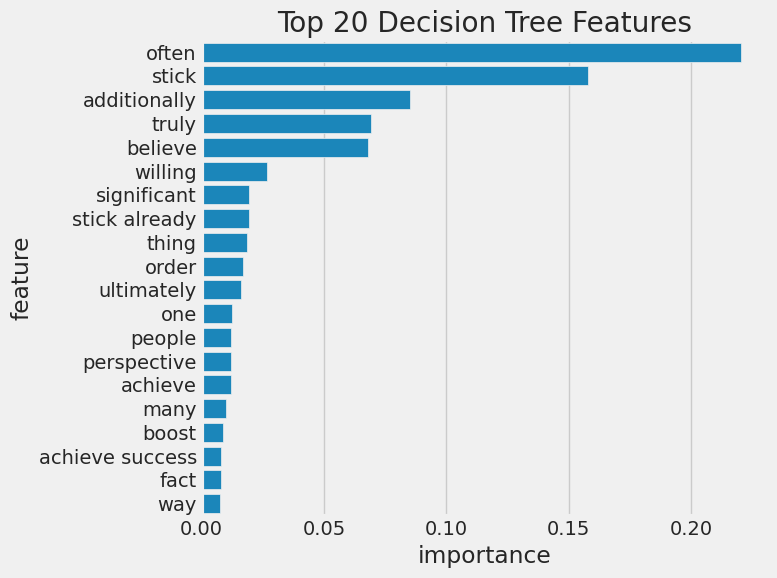

In [47]:
# Feature Importance for Decision Tree
importances = dt_grid.best_estimator_.named_steps['clf'].feature_importances_
features    = dt_grid.best_estimator_.named_steps['tfidf'].get_feature_names_out()

# Get top 20
imp_df = (
    pd.DataFrame({'feature': features, 'importance': importances})
      .sort_values('importance', ascending=False)
      .head(20)
)
plt.figure(figsize=(8,6))
sns.barplot(data=imp_df, y='feature', x='importance')
plt.title("Top 20 Decision Tree Features")
plt.tight_layout()
plt.show()


In [48]:
# Train AdaBoost Pipeline

# Base estimator
base_tree = DecisionTreeClassifier(max_depth=2, class_weight='balanced', random_state=SEED)

# Pipeline
ab_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', AdaBoostClassifier(estimator=base_tree, random_state=SEED))
])

# Grid search parameters
ab_param_grid = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'clf__n_estimators': [100, 200],
    'clf__learning_rate': [0.5, 1.0]
}

# GridSearchCV
ab_grid = GridSearchCV(
    ab_pipe,
    ab_param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Train the model
start_time = time.time()
# Pass the already transformed data to the fit method
ab_grid.fit(X_train, y_train) # Pass raw text data to the pipeline
ab_train_time = time.time() - start_time

ab_predictions = ab_grid.predict(X_val)
ab_accuracy = metrics.accuracy_score(y_val, ab_predictions)

print("Decision Tree Results:")
print(f"Training time: {ab_train_time:.3f} seconds")
print("Best DT Params:", ab_grid.best_params_)
print(f"Best cross-validation score: {ab_grid.best_score_:.4f}")
print(f"Validation accuracy: {ab_accuracy:.4f}")


print(classification_report(y_val, ab_grid.predict(X_val)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Decision Tree Results:
Training time: 1397.656 seconds
Best DT Params: {'clf__learning_rate': 1.0, 'clf__n_estimators': 200, 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 2)}
Best cross-validation score: 0.9685
Validation accuracy: 0.9692
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       373
           1       0.97      0.97      0.97       373

    accuracy                           0.97       746
   macro avg       0.97      0.97      0.97       746
weighted avg       0.97      0.97      0.97       746



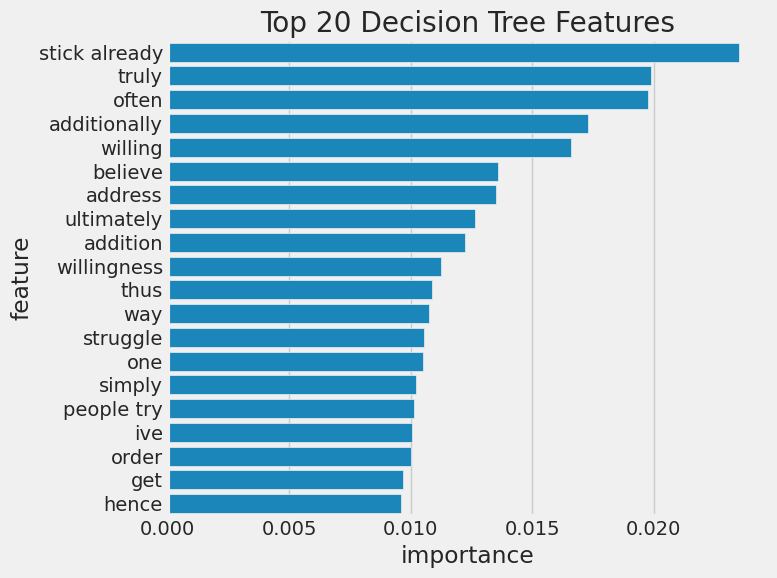

In [50]:
# Feature Importance for AdaBoost
importances = ab_grid.best_estimator_.named_steps['clf'].feature_importances_
features    = ab_grid.best_estimator_.named_steps['tfidf'].get_feature_names_out()

# Get top 20
imp_df = (
    pd.DataFrame({'feature': features, 'importance': importances})
      .sort_values('importance', ascending=False)
      .head(20)
)
plt.figure(figsize=(8,6))
sns.barplot(data=imp_df, y='feature', x='importance')
plt.title("Top 20 Decision Tree Features")
plt.tight_layout()
plt.show()

In [51]:
# Best models for all
best_svm = svm_grid.best_estimator_
best_dt = dt_grid.best_estimator_
best_ab = ab_grid.best_estimator_

In [55]:
#Dump pkl files of best models
joblib.dump(svm_grid.best_estimator_, '/content/drive/MyDrive/Models/svm_model.pkl')
joblib.dump(dt_grid.best_estimator_, '/content/drive/MyDrive/Models/dt_model.pkl')
joblib.dump(ab_grid.best_estimator_, '/content/drive/MyDrive/Models/ab_model.pkl')
joblib.dump(tfidf, '/content/drive/MyDrive/Models/tfidf_vectorizer.pkl')

['/content/drive/MyDrive/Models/tfidf_vectorizer.pkl']

# **Performance Evaluation & Analysis**


Detailed Evaluation of Best SVM
--------------------------------------------------
Accuracy : 0.9665
Precision: 0.9603
Recall   : 0.9732
F1-Score : 0.9667

Confusion Matrix:
[[358  15]
 [ 10 363]]


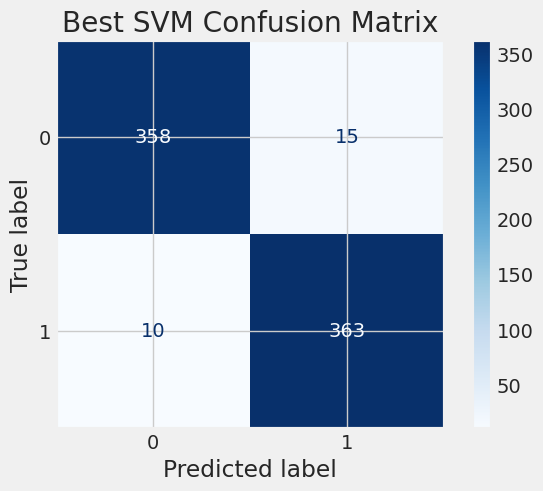


Detailed Evaluation of Best Decision Tree
--------------------------------------------------
Accuracy : 0.8472
Precision: 0.8843
Recall   : 0.7989
F1-Score : 0.8394

Confusion Matrix:
[[334  39]
 [ 75 298]]


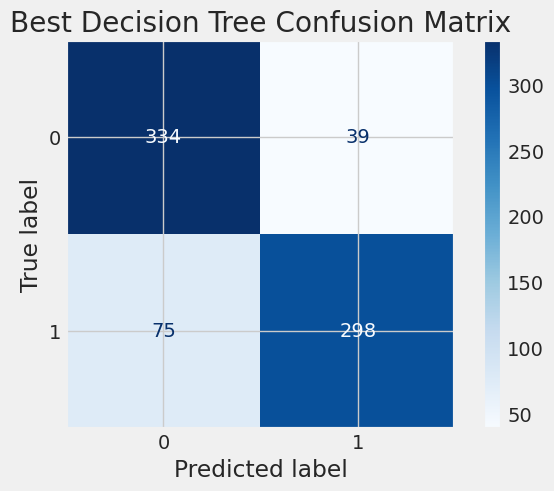


Detailed Evaluation of Best AdaBoost
--------------------------------------------------
Accuracy : 0.9692
Precision: 0.9730
Recall   : 0.9651
F1-Score : 0.9690

Confusion Matrix:
[[363  10]
 [ 13 360]]


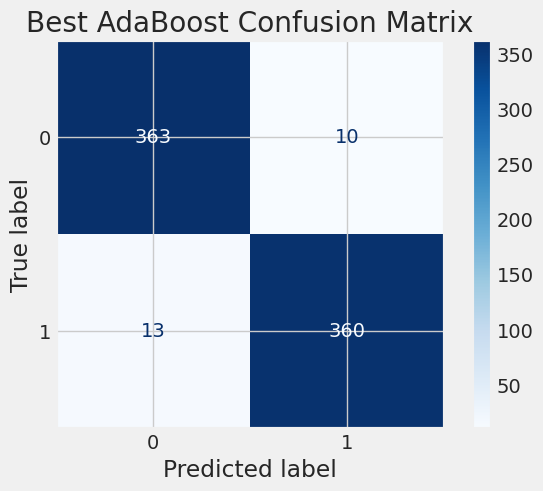

In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt

def detailed_eval(model, X, y, model_name="Model"):
    """
    Prints accuracy, precision, recall, F1 and shows a confusion matrix.
    Assumes a binary classification task.
    """
    y_pred = model.predict(X)

    acc   = metrics.accuracy_score(y, y_pred)
    prec  = metrics.precision_score(y, y_pred)
    rec   = metrics.recall_score(y, y_pred)
    f1    = metrics.f1_score(y, y_pred)
    cm    = metrics.confusion_matrix(y, y_pred)

    print(f"\nDetailed Evaluation of {model_name}")
    print("-" * 50)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")

    print("\nConfusion Matrix:")
    print(cm)

    # Optional: plot it
    metrics.ConfusionMatrixDisplay.from_predictions(
        y, y_pred, cmap="Blues", normalize=None
    )
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# — Evaluate SVM —
detailed_eval(best_svm, X_val, y_val, model_name="Best SVM")

# — Evaluate Decision Tree —
detailed_eval(best_dt,  X_val, y_val, model_name="Best Decision Tree")

# - Evaluate AdaBoost -
detailed_eval(best_ab,  X_val, y_val, model_name="Best AdaBoost")

**5-Fold K-Fold Cross-Validation**

In [53]:

from sklearn.model_selection import cross_val_score, KFold
import numpy as np


kf = KFold(n_splits=5, shuffle=True, random_state=SEED)

# SVM
svm_scores = cross_val_score(
    best_svm, X, y,
    cv=kf,
    scoring='f1_macro',
    n_jobs=-1
)
print("=== Regular 5-Fold CV (KFold) ===")
print("SVM F1-macro scores per fold:   ", np.round(svm_scores, 4))
print(" → Mean: {:.4f}   Std: {:.4f}\n".format(svm_scores.mean(), svm_scores.std()))

# Decision Tree
dt_scores = cross_val_score(
    best_dt, X, y,
    cv=kf,
    scoring='f1_macro',
    n_jobs=-1
)
print("Decision Tree F1-macro scores per fold:", np.round(dt_scores, 4))
print(" → Mean: {:.4f}   Std: {:.4f}".format(dt_scores.mean(), dt_scores.std()))

# AdaBoost
ab_scores = cross_val_score(
    best_ab, X, y,
    cv=kf,
    scoring='f1_macro',
    n_jobs=-1
)
print("AdaBoost F1-macro scores per fold:", np.round(ab_scores, 4))
print(" → Mean: {:.4f}   Std: {:.4f}".format(ab_scores.mean(), ab_scores.std()))

=== Regular 5-Fold CV (KFold) ===
SVM F1-macro scores per fold:    [0.9651 0.9678 0.9705 0.9799 0.9785]
 → Mean: 0.9724   Std: 0.0058

Decision Tree F1-macro scores per fold: [0.8736 0.8646 0.8686 0.8577 0.8738]
 → Mean: 0.8677   Std: 0.0061
AdaBoost F1-macro scores per fold: [0.9745 0.9665 0.9611 0.9691 0.9637]
 → Mean: 0.9670   Std: 0.0046


**5-Fold StratifiedKFold Cross-Validation**

In [54]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# SVM
svm_strat_scores = cross_val_score(
    best_svm, X, y,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1
)
print("=== Stratified 5-Fold CV (StratifiedKFold) ===")
print("SVM F1-macro per fold:   ", np.round(svm_strat_scores, 4))
print(" → Mean: {:.4f}   Std: {:.4f}\n".format(svm_strat_scores.mean(), svm_strat_scores.std()))

# Decision Tree
dt_strat_scores = cross_val_score(
    best_dt, X, y,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1
)
print("Decision Tree F1-macro per fold:", np.round(dt_strat_scores, 4))
print(" → Mean: {:.4f}   Std: {:.4f}".format(dt_strat_scores.mean(), dt_strat_scores.std()))

# AdaBoost
ab_strat_scores = cross_val_score(
    best_ab, X, y,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1
)
print("AdaBoost F1-macro per fold:", np.round(ab_strat_scores, 4))
print(" → Mean: {:.4f}   Std: {:.4f}".format(ab_strat_scores.mean(), ab_strat_scores.std()))

=== Stratified 5-Fold CV (StratifiedKFold) ===
SVM F1-macro per fold:    [0.9799 0.9692 0.9745 0.9718 0.9799]
 → Mean: 0.9751   Std: 0.0043

Decision Tree F1-macro per fold: [0.8632 0.8673 0.8699 0.8724 0.8655]
 → Mean: 0.8677   Std: 0.0032
AdaBoost F1-macro per fold: [0.9705 0.9678 0.9692 0.9718 0.9664]
 → Mean: 0.9692   Std: 0.0019


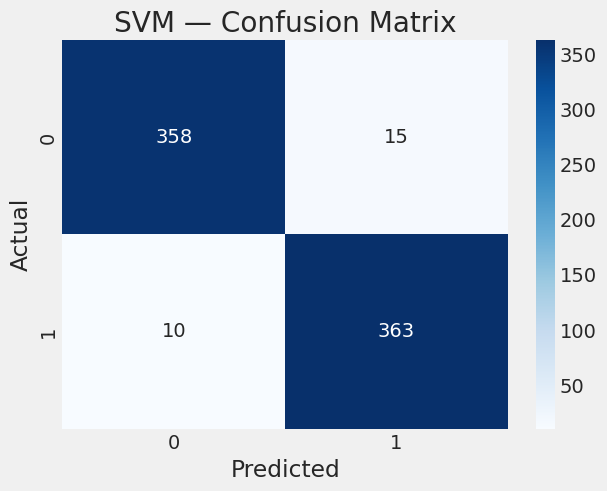

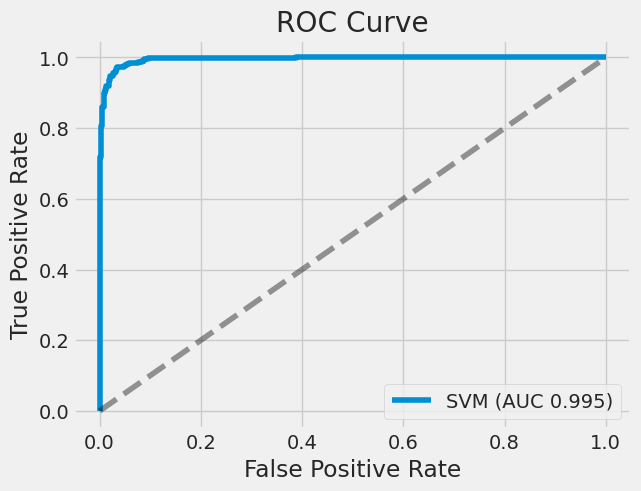

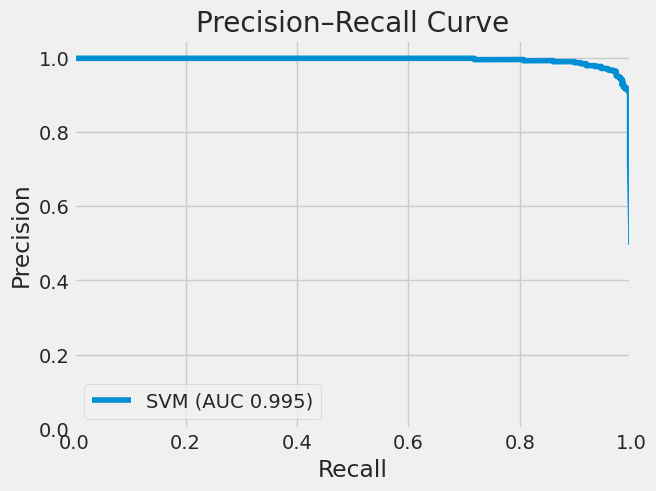

              precision    recall  f1-score   support

           0     0.9728    0.9598    0.9663       373
           1     0.9603    0.9732    0.9667       373

    accuracy                         0.9665       746
   macro avg     0.9666    0.9665    0.9665       746
weighted avg     0.9666    0.9665    0.9665       746



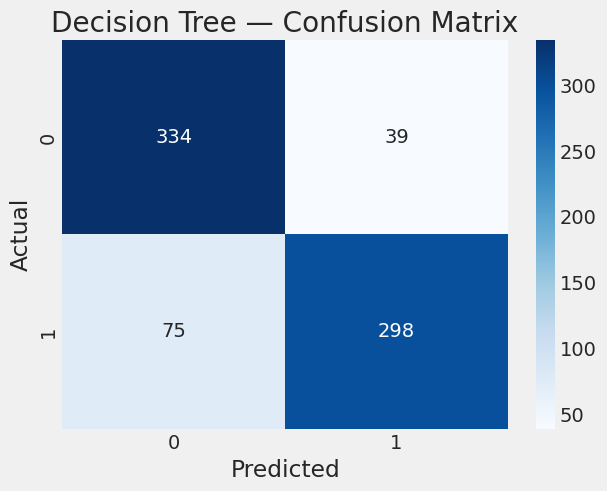

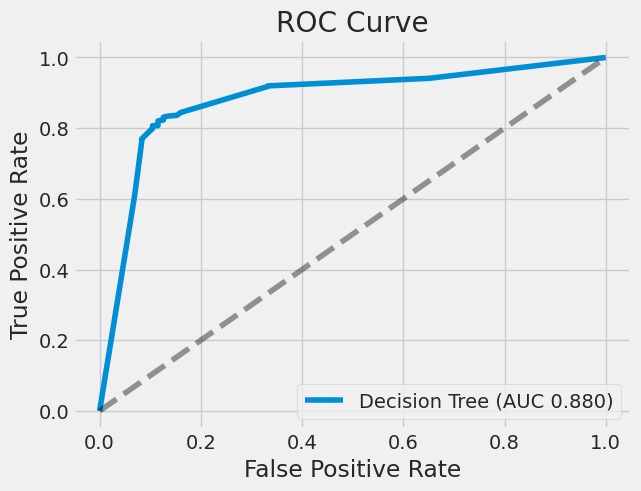

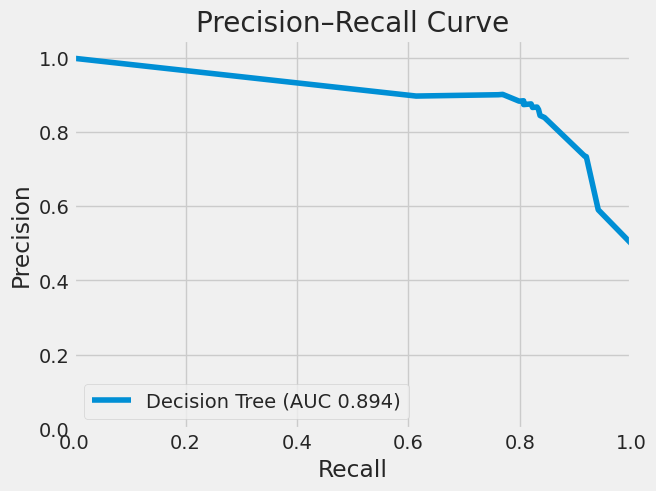

              precision    recall  f1-score   support

           0     0.8166    0.8954    0.8542       373
           1     0.8843    0.7989    0.8394       373

    accuracy                         0.8472       746
   macro avg     0.8504    0.8472    0.8468       746
weighted avg     0.8504    0.8472    0.8468       746



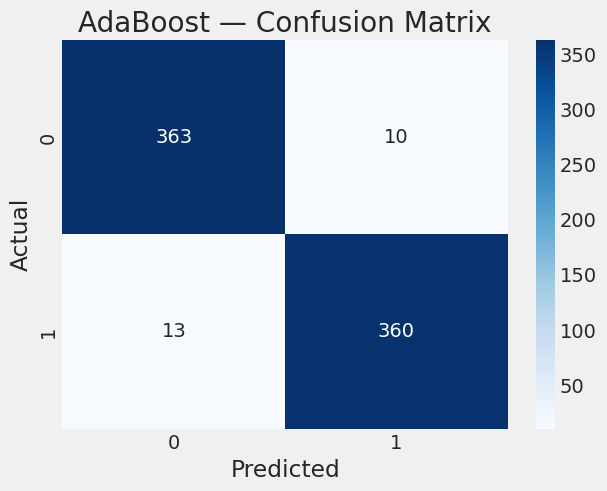

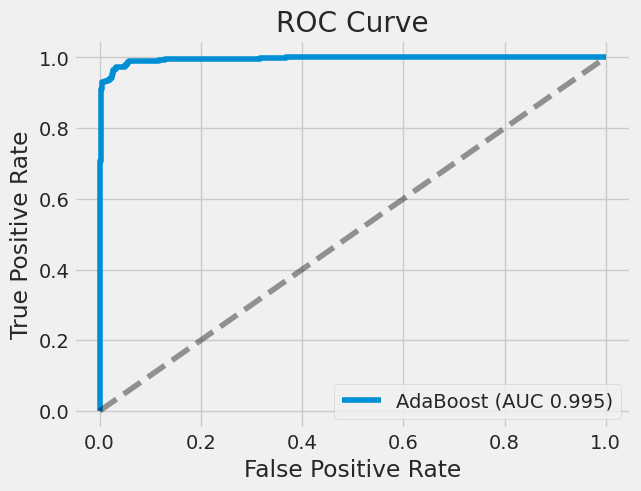

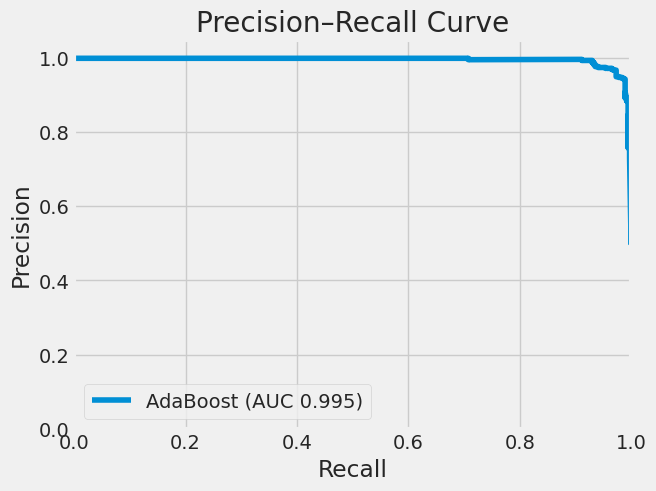

              precision    recall  f1-score   support

           0     0.9654    0.9732    0.9693       373
           1     0.9730    0.9651    0.9690       373

    accuracy                         0.9692       746
   macro avg     0.9692    0.9692    0.9692       746
weighted avg     0.9692    0.9692    0.9692       746



,Accuracy,Precision (macro),Recall (macro),F1 (macro),Precision (weighted),Recall (weighted),F1 (weighted)
Model,,,,,,,
SVM,0.9665,0.9666,0.9665,0.9665,0.9666,0.9665,0.9665
Decision Tree,0.8472,0.8504,0.8472,0.8468,0.8504,0.8472,0.8468
AdaBoost,0.9692,0.9692,0.9692,0.9692,0.9692,0.9692,0.9692



=== AdaBoost: sample mis-classifications ===


,essay,label,predicted
37,A nation becomes more interesting and advance ...,0,1
1953,Children‚Äôs development is extremely importan...,1,0
1989,Eating insects is not a new concept. In severa...,1,0
2213,"Today, English is one of the most widely spoke...",1,0
3213,"For me, it‚Äôs important to point out that mos...",1,0
1585,I agree with the statement above because I thi...,0,1
201,It is often said that all influential TV enter...,0,1
2660,We can‚Äôt group all successful people togethe...,1,0
166,"Punishing children with physical force, or cor...",0,1
492,"In recent years, some people believe that it i...",0,1


In [57]:
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy for sorting

def evaluate(model, X_val, y_val, name="Model"):
    # 1) Predictions
    y_pred = model.predict(X_val)

    # 2) Continuous scores for ROC/PR
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_val)
    else:
        y_score = model.predict_proba(X_val)[:, 1]

    # 3) Core metrics
    acc = accuracy_score(y_val, y_pred)
    prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(
        y_val, y_pred, average="macro", zero_division=0
    )
    prec_w, rec_w, f1_w, _ = precision_recall_fscore_support(
        y_val, y_pred, average="weighted", zero_division=0
    )

    # 4) Confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 5) ROC curve
    try:
        fpr, tpr, _ = roc_curve(y_val, y_score)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f"{name} (AUC {roc_auc:.3f})")
        plt.plot([0,1],[0,1],"k--", alpha=0.4)
        plt.title("ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()
    except ValueError as e:
        print(f"Error plotting ROC curve for {name}: {e}")


    # 6) Precision–Recall curve
    try:
        precision_vals, recall_vals, _ = precision_recall_curve(y_val, y_score)
        # Sort the values by recall to ensure they are increasing
        sorted_indices = np.argsort(recall_vals)
        recall_vals = recall_vals[sorted_indices]
        precision_vals = precision_vals[sorted_indices]

        pr_auc = auc(recall_vals, precision_vals)
        plt.figure()
        plt.plot(recall_vals, precision_vals, label=f"{name} (AUC {pr_auc:.3f})")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(f"Precision–Recall Curve")
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.legend()
        plt.show()
    except ValueError as e:
        print(f"Error plotting Precision-Recall curve for {name}: {e}")


    # 7) Text report
    print(classification_report(y_val, y_pred, digits=4))

    # 8) Return summary metrics
    metrics_dict = {
        "Model": name,
        "Accuracy": acc,
        "Precision (macro)": prec_macro,
        "Recall (macro)": rec_macro,
        "F1 (macro)": f1_macro,
        "Precision (weighted)": prec_w,
        "Recall (weighted)": rec_w,
        "F1 (weighted)": f1_w,
    }
    return metrics_dict, y_pred


metrics_svm, preds_svm = evaluate(best_svm, X_val, y_val, "SVM")
metrics_dt,  preds_dt  = evaluate(best_dt, X_val, y_val, "Decision Tree")
metrics_ab,  preds_ab  = evaluate(best_ab, X_val, y_val, "AdaBoost")

# Comparison table
comparison = pd.DataFrame([metrics_svm, metrics_dt, metrics_ab]).set_index("Model")
display(comparison.style.format("{:.4f}"))

# Sample misclassifications for the better model
better_model = comparison["F1 (macro)"].idxmax()
if better_model == "SVM":
    better_preds = preds_svm
elif better_model == "Decision Tree":
    better_preds = preds_dt
else: # AdaBoost is the better model
    better_preds = preds_ab


mis_idx = y_val.index[y_val != better_preds]
err_df = df_train.loc[
    mis_idx, ["essay", "label"]
].copy()
err_df["predicted"] = better_preds[y_val != better_preds]

print(f"\n=== {better_model}: sample mis-classifications ===")
display(err_df.head(10))